In [1]:
import numpy as np
import csv 
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
k = open('/home/tdrozd/development/sirv-suite/SIRV_suite_project/test_output.csv', 'r')
r = csv.reader(k,delimiter="\t")

value_list = []
in_dict = dict()

row_it = 0
for row in r:
    if (row_it==0):
        key_names = row[1:]
        for key in key_names:
            in_dict[key] = np.array([])
    else:
        key_it = 1
        for key in key_names:
            in_dict[key] = np.append(in_dict[key], float(row[key_it]))
            key_it += 1 
    
    row_it += 1
    
plot_list = []
for key in key_names:
    plot_list.append(in_dict[key])

<IPython.core.display.Javascript object>


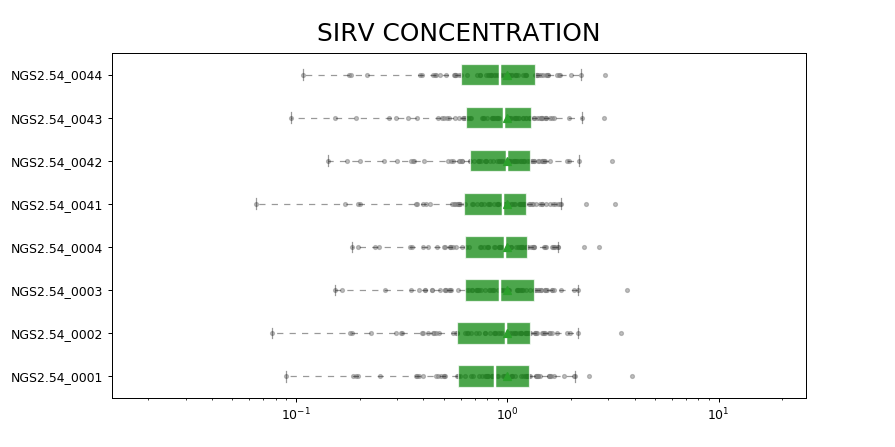

In [79]:
tog = plot_list

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.set_xscale('log')
ax1.set_title("SIRV CONCENTRATION", size = 20, pad = 10, loc = 'center',
              fontdict = {'verticalalignment':'baseline'})

for i in range(0,len(tog)):
    x = np.ones(len(tog[i]))*(i+1)
    ax1.scatter(tog[i], x, alpha = 0.5, s = 10, color = 'gray')

ax1.boxplot(tog,
            0,
            "rs",
            0, 
            widths = 0.5, 
            boxprops = dict(facecolor='green', color='white', alpha = 0.7),
            medianprops = dict(color='white', linewidth = 2),
            whiskerprops = dict(linestyle = (0,(5,5)), alpha = 0.4, color = 'black'),
            capprops = dict(alpha = 0.4, color = 'black'),
            showmeans = True,
            patch_artist = True,
            showfliers = False)

# meanprops = dict(marker='o',markeredgecolor='red', markerfacecolor = 'green', markersize = 8 , alpha = 0.7),
#ax1.plot([1,1],[0.6,8.4], color = 'darkblue', alpha = .6)

ax1.set_yticklabels(key_names)
fig.show()
fig.savefig("test_output.svg", dpi = 300, quality = 100)